Import evaluation metrics file

In [2]:
import eval as eval
import importlib

Write filename constants

In [14]:
UNFILTERED = 'moving_avg/output.wav'
FILTERED = 'simple_classification/output.wav'
TEST = 'normalized/test_rec.wav'

Draw histograms to observe differences and similiarities, ideally simple_classificaiton should look similiarily to test_rec

Highest amplitude: 32767, lowest amplitude: -32768


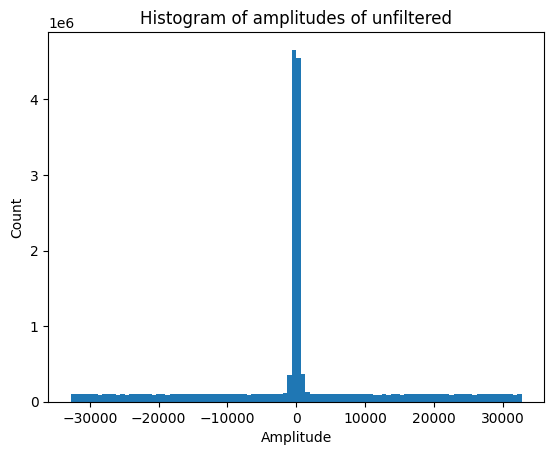

Highest amplitude: 32767, lowest amplitude: -32768


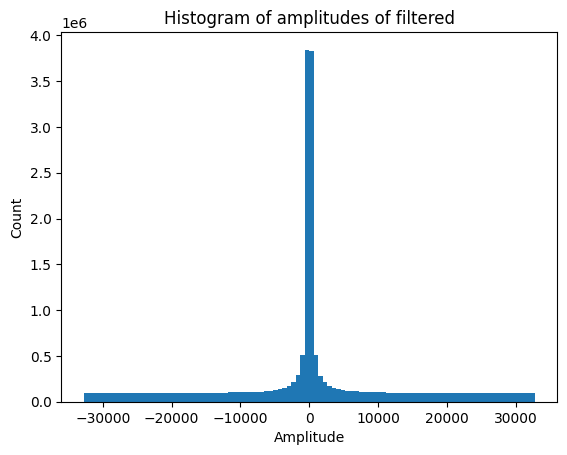

Highest amplitude: 32760, lowest amplitude: -32768


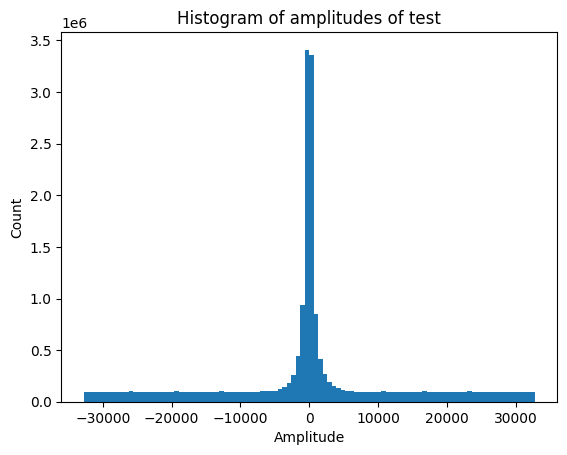

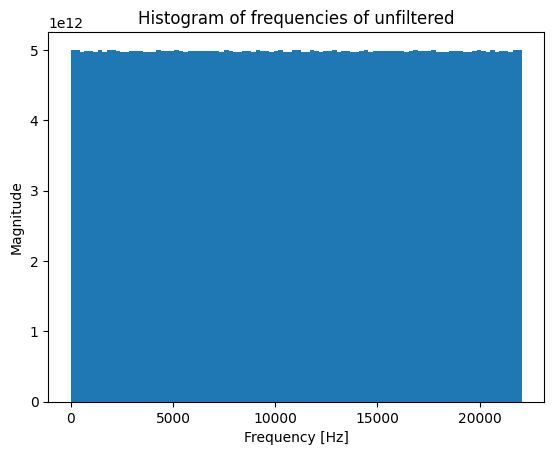

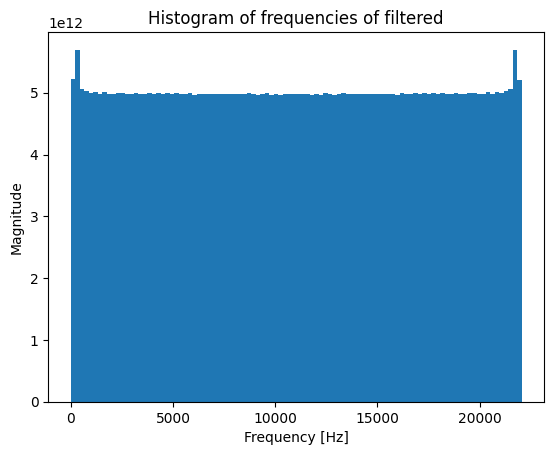

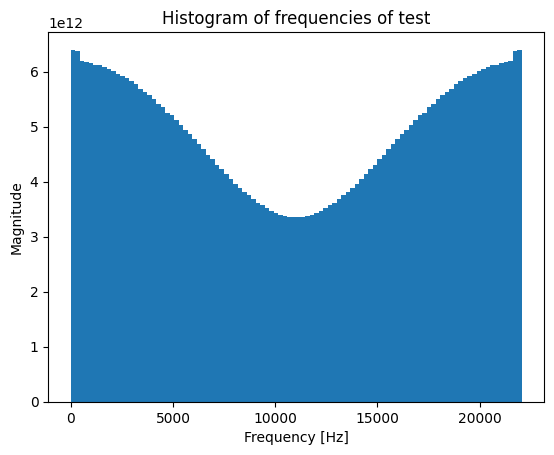

/home/josiah/repos/MultiMicFusion/eval.py:87: RuntimeWarning: invalid value encountered in log10
  volume_db = 20 * np.log10(np.abs(signal))


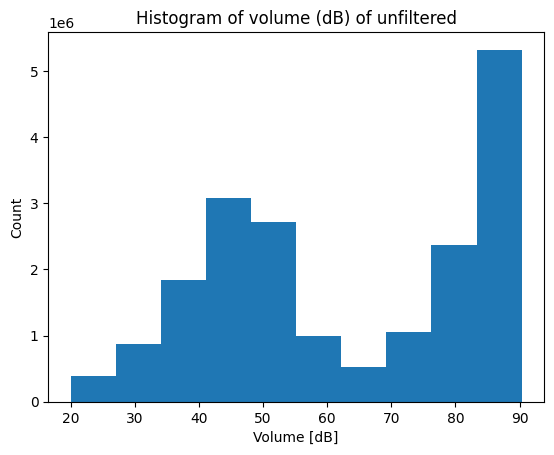

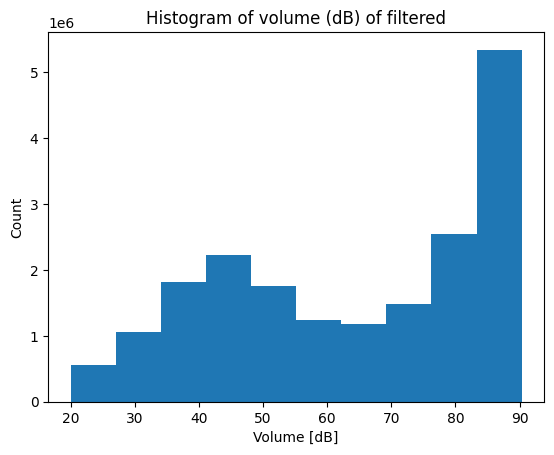

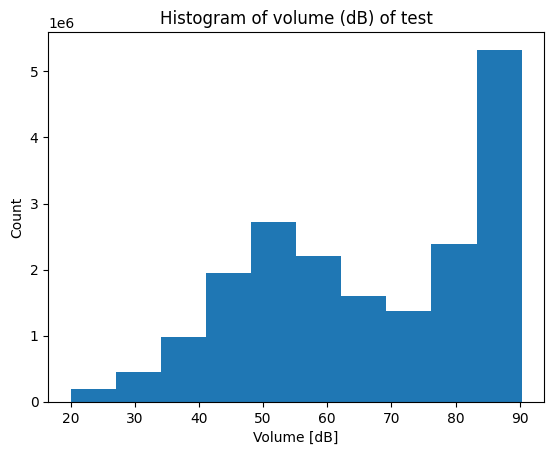

In [15]:
importlib.reload(eval)
eval.histogram_of_amplitudes(UNFILTERED, 'unfiltered')
eval.histogram_of_amplitudes(FILTERED, 'filtered')
eval.histogram_of_amplitudes(TEST, 'test')

eval.histogram_of_frequencies(UNFILTERED, 'unfiltered')
eval.histogram_of_frequencies(FILTERED, 'filtered')
eval.histogram_of_frequencies(TEST, 'test')

eval.histogram_of_volume_db(UNFILTERED, 'unfiltered')
eval.histogram_of_volume_db(FILTERED, 'filtered')
eval.histogram_of_volume_db(TEST, 'test')


As observed, across frequency, amplitude, and volume, the filtered wave is much closer than the unfiltered wave

optional? normalize volumes?

Compare distances of amplitude histograms

In [21]:
importlib.reload(eval)
eval.compare_amp_hist(TEST, UNFILTERED)
eval.compare_amp_hist(TEST, FILTERED)

amplitude hist diff: 1.122e+05 between normalized/test_rec.wav and moving_avg/output.wav
amplitude hist diff: 3.327e+05 between normalized/test_rec.wav and simple_classification/output.wav


332696

Compare distance of frequency histograms

In [31]:
importlib.reload(eval)
unfiltered_dis = eval.compare_freq_hist(TEST, UNFILTERED)
filtered_dis = eval.compare_freq_hist(TEST, FILTERED)
reduction = round((unfiltered_dis - filtered_dis)*100/unfiltered_dis, 3)
print(f'Distance reduced by {reduction}% for frequency histogram')

frequency hist diff: 7.798e+13 between normalized/test_rec.wav and moving_avg/output.wav
frequency hist diff: 7.653e+13 between normalized/test_rec.wav and simple_classification/output.wav
Distance reduced by 1.855% for frequency histogram


Compare distance of volume histograms

In [32]:
importlib.reload(eval)
volume_unfiltered = eval.compare_db_hist(TEST, UNFILTERED)
volume_filtered = eval.compare_db_hist(TEST, FILTERED)

reduction = round((volume_unfiltered-volume_filtered)*100/volume_unfiltered, 3)
print(f'Volume(db) is reduced by {reduction}%')


/home/josiah/repos/MultiMicFusion/eval.py:231: RuntimeWarning: invalid value encountered in log10
  volume_db_one = 20 * np.log10(np.abs(signal_one)+10)
/home/josiah/repos/MultiMicFusion/eval.py:232: RuntimeWarning: invalid value encountered in log10
  volume_db_two = 20 * np.log10(np.abs(signal_two)+10)


volume hist diff: 5.236e+06 between normalized/test_rec.wav and moving_avg/output.wav
volume hist diff: 4.714e+06 between normalized/test_rec.wav and simple_classification/output.wav
Volume(db) is reduced by 9.964%


Use a moving window to compute distances of frequency, volume, and amplitude

In [42]:
importlib.reload(eval)
WINDOW_SIZE_SECONDS = 5
distance_amp, distance_freq, distance_vol = eval.moving_window_distance(TEST, UNFILTERED, WINDOW_SIZE_SECONDS)
distance_amp_fil, distance_freq_fil, distance_vol_fil = eval.moving_window_distance(TEST, FILTERED, WINDOW_SIZE_SECONDS)

freq_reduction = round((distance_freq - distance_freq_fil)*100/distance_freq, 3)
print(f'Distance reduced by {freq_reduction}% for moving frequency histogram')

/home/josiah/repos/MultiMicFusion/eval.py:277: RuntimeWarning: invalid value encountered in log10
  distance_amp_sn = "{:.3e}".format(distance_amp)
/home/josiah/repos/MultiMicFusion/eval.py:278: RuntimeWarning: invalid value encountered in log10
  distance_freq_sn = "{:.3e}".format(distance_freq)


Moving window distance of amplitude: 2.430e+05, frequency: 5.970e+08, volume: 1.839e+03 between normalized/test_rec.wav and moving_avg/output.wav
Moving window distance of amplitude: 4.944e+05, frequency: 5.680e+08, volume: 5.156e+03 between normalized/test_rec.wav and simple_classification/output.wav
Distance reduced by 4.872% for moving frequency histogram
